In [86]:
import math as mh
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import RobustScaler

In [48]:
data = pd.read_csv("malicious_phish.csv")

In [49]:
len(data)

15146

In [68]:
 print(data.isnull().sum()) # tekrar eden veri var!!!

url     0
type    0
dtype: int64


In [67]:
data = data.dropna(subset=['type']) # bu komut ile sildik

In [72]:
missing_values = data.isnull().sum()
print(missing_values)
#eksik verilerin hangi sütunlarda ve ne kadar miktarda olduğunu kontrol ettik
#İlk olarak, hangi sütunlarda kaç adet eksik veri olduğunu gördünüz. Eksik veri olmayan sütunlar 0 eksik veriye sahipken, eksik veri olan sütunlarda bu değerler farklı çıktı

url     0
type    0
dtype: int64


In [69]:
print(data.info()) #Veri kümesinin genel bilgilerini gördük

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15145 entries, 0 to 15144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     15145 non-null  object
 1   type    15145 non-null  object
dtypes: object(2)
memory usage: 355.0+ KB
None


In [52]:
print(data.describe()) #Sayısal sütunların istatistiksel özetini gördük

                                                      url    type
count                                               15146   15145
unique                                              15077       4
top     http://style.org.hc360.com/css/detail/mysite/s...  benign
freq                                                    7   11104


In [53]:
data.columns #Sütun İsimlerini ve tipini gördük

Index(['url', 'type'], dtype='object')

In [54]:
data.shape  #Sütun Sayısı ve Veri Sayısını Gördük

(15146, 2)

In [55]:
data.dtypes  # Veri Tiplerini Gördük

url     object
type    object
dtype: object

In [56]:
data['url'].value_counts() #veri kümesindeki URL'lerin dağılımını anlayabildik

http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css                                                 7
http://www.pubyun.com/wiki/lib/exe/css.php?t=dokuwiki&tseed=f1f16e8c6142fab8553f2b9cfe045961                            5
http://9779.info/%E5%BF%AB%E4%B9%90%E6%9A%91%E5%81%87%E7%9A%84%E5%89%AA%E8%B4%B4%E7%94%BB/                              4
http://9779.info/%E6%A0%91%E5%8F%B6%E8%B4%B4%E7%94%BB%E4%BD%9C%E5%93%81/                                                3
http://bjpgqsc.com/gwzh/class/?0.html&page=2&showtj=&showhot=&key=                                                      3
                                                                                                                       ..
thefader.com/2011/11/08/elite-gymnastics-so-close-to-paradise-3-physical-therapy-remix-mp3/                             1
freewebs.com/johnnyyongbosch/                                                                                           1
http://www.radioroccella

In [58]:
data['url'].unique()   #Her sütundaki benzersiz değerleri gördük

array(['br-icloud.com.br', 'mp3raid.com/music/krizz_kaliko.html',
       'bopsecrets.org/rexroth/cr/1.htm', ...,
       'wolfparade.nonstuff.com/2008/04/29/at-mount-zoomer/',
       'http://www.casuarinamedia.com.au/sejeal.jpg',
       'http://www.beckundbrauchle.de/index.php?option=com_content&view=artic'],
      dtype=object)

In [60]:
print(data['url'].head())
print(data['type'].head())


0                                     br-icloud.com.br
1                  mp3raid.com/music/krizz_kaliko.html
2                      bopsecrets.org/rexroth/cr/1.htm
3    http://www.garage-pirenne.be/index.php?option=...
4    http://adventure-nicaragua.net/index.php?optio...
Name: url, dtype: object
0      phishing
1        benign
2        benign
3    defacement
4    defacement
Name: type, dtype: object


In [62]:
unique_values = data['type'].unique()
print(unique_values)


['phishing' 'benign' 'defacement' 'malware' nan]


In [23]:
data.describe() #sayısal verilere sahip sütunların istatistiksel özetini sağlar.

,url,type
count,15146,15145
unique,15077,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,7,11104


In [63]:
data.info() #boş değeri doldurduk 1 rakamı farklıydı yanlışş yazmışsın
#burada artık gerekszi veriler tespit etme ayırt etme yöntemine giriyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15146 entries, 0 to 15145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     15146 non-null  object
 1   type    15145 non-null  object
dtypes: object(2)
memory usage: 236.8+ KB


In [71]:
#verinin yedeğini almak çok öenmlidir bizim için ve burada yedeğini alıp adımlarımıza geçiyoruz
#veri ön işleme süreci başlıyor
dataset = data.copy()

In [42]:
#Veri Kümesinin Veri Tiplerini Kontrol Etme kullanacağız
numeric_columns = dts.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)


Index([], dtype='object')


In [ ]:
dataset['type'].value_counts()
dataset['url'].value_counts()


http://example.com       1
http://another.com       1
http://yetanother.com    1
Name: url, dtype: int64

In [78]:

from urllib.parse import urlparse


# URL uzunluğu
dataset['url_length'] = dataset['url'].apply(lambda x: len(x))

# Rakam sayısı
dataset['number_count'] = dataset['url'].apply(lambda x: sum(c.isdigit() for c in x))

# Alt dizin sayısı
dataset['subdir_count'] = dataset['url'].apply(lambda x: x.count('/'))

# Nokta sayısı
dataset['dot_count'] = dataset['url'].apply(lambda x: x.count('.'))

# Soru işareti sayısı
dataset['question_mark_count'] = dataset['url'].apply(lambda x: x.count('?'))

# URL içindeki özel karakter sayısı
special_characters = ['@', '#', '$', '%', '&', '*', '+', '=', '|', '\\', ':']
dataset['special_char_count'] = dataset['url'].apply(lambda x: sum(x.count(char) for char in special_characters))

# URL içindeki parametre sayısı
dataset['param_count'] = dataset['url'].apply(lambda x: x.count('&') + 1 if '?' in x else 0)

# URL içindeki harf ve sayı oranları
dataset['letter_ratio'] = dataset['url'].apply(lambda x: sum(c.isalpha() for c in x) / len(x))
dataset['digit_ratio'] = dataset['url'].apply(lambda x: sum(c.isdigit() for c in x) / len(x))

# TLD (Top Level Domain) çeşiti ve uzunluğu
dataset['tld'] = dataset['url'].apply(lambda x: urlparse(x).netloc.split('.')[-1])
dataset['tld_length'] = dataset['tld'].apply(lambda x: len(x))

# Dosya uzantısı var mı yok mu?
dataset['has_extension'] = dataset['url'].apply(lambda x: 1 if '.' in x else 0)

# Domain Adı Analizi
dataset['domain'] = dataset['url'].apply(lambda x: urlparse(x).netloc)
dataset['subdomain'] = dataset['url'].apply(lambda x: urlparse(x).netloc.split('.')[:-2])
dataset['domain_length'] = dataset['domain'].apply(lambda x: len(x))
dataset['subdomain_length'] = dataset['subdomain'].apply(len)

dataset.head()


,url,type,url_length,number_count,subdir_count,dot_count,question_mark_count,special_char_count,param_count,letter_ratio,digit_ratio,tld,tld_length,has_extension,domain,subdomain,domain_length,subdomain_length
0,br-icloud.com.br,3,16,0,0,2,0,0,0,0.812500,0.000000,,0,1,,[],0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,1,2,2,0,0,0,0.828571,0.028571,,0,1,,[],0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,1,3,2,0,0,0,0.806452,0.032258,,0,1,,[],0,0
3,http://www.garage-pirenne.be/index.php?option=...,1,88,7,3,3,1,8,4,0.715909,0.079545,be,2,1,www.garage-pirenne.be,[www],21,1
4,http://adventure-nicaragua.net/index.php?optio...,1,235,22,3,2,1,6,3,0.846809,0.093617,net,3,1,adventure-nicaragua.net,[],23,0


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15145 entries, 0 to 15144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     15145 non-null  object
 1   type    15145 non-null  object
dtypes: object(2)
memory usage: 355.0+ KB


In [99]:
dataset= dataset.drop('subdomain',axis=1)


In [80]:
#label engoding işlemi yaptık
label_encoder = LabelEncoder()

dataset['domain'] = label_encoder.fit_transform(dataset['domain'])

dataset['type'] = label_encoder.fit_transform(dataset['type'])


dataset['tld'] = label_encoder.fit_transform(dataset['tld'])

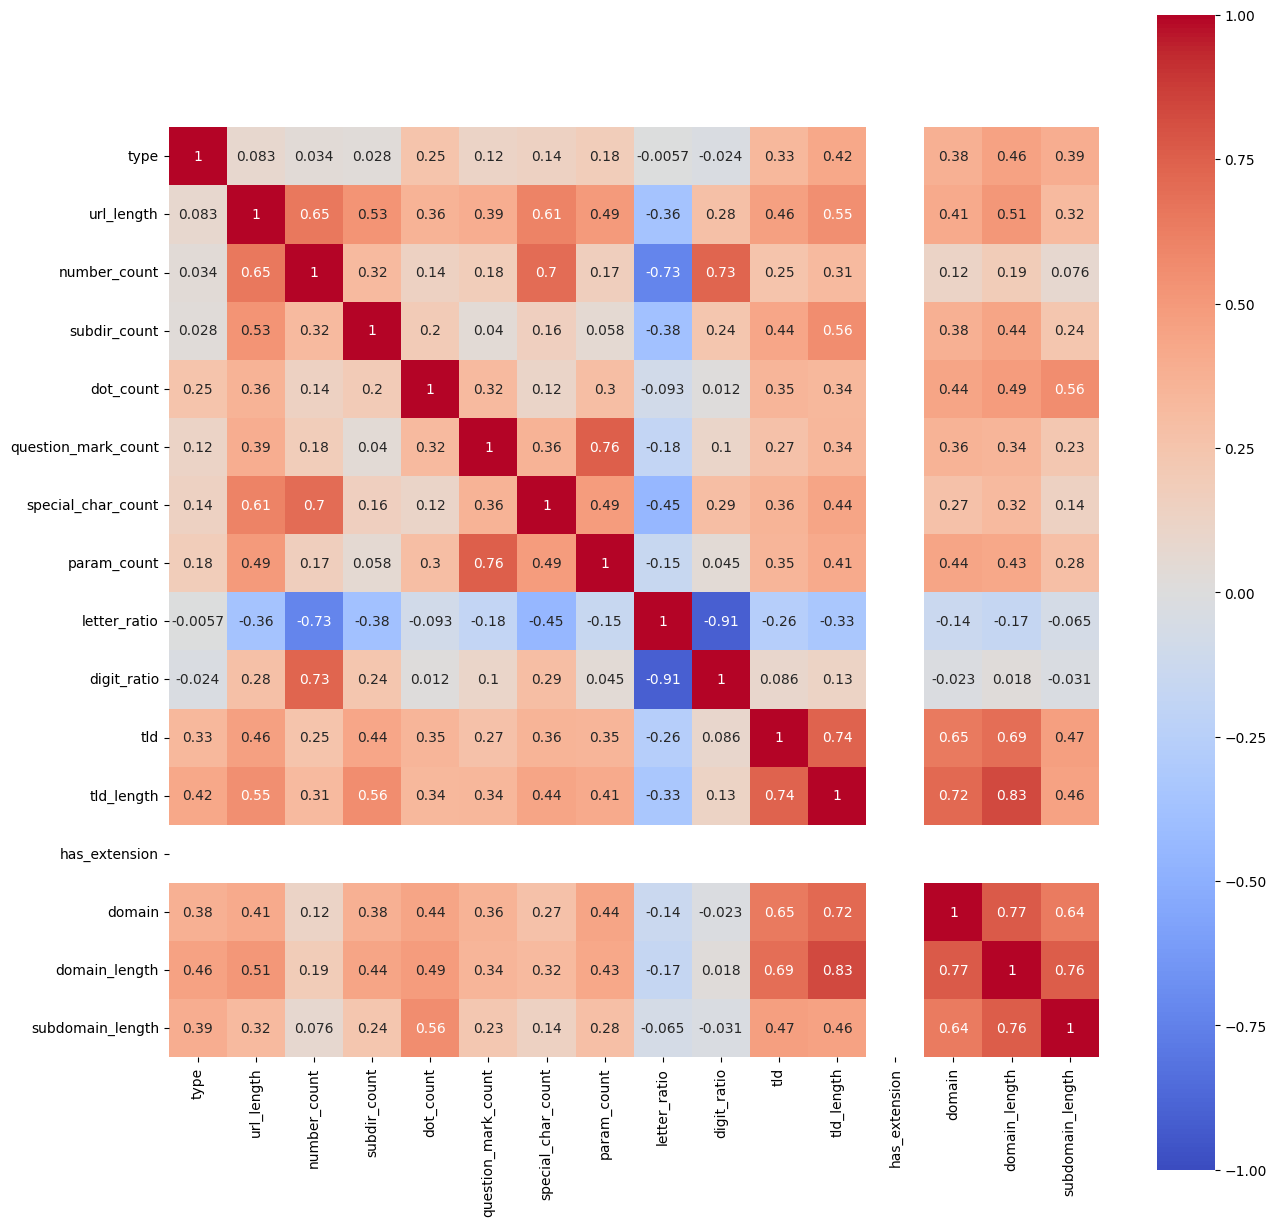

In [100]:
plt.figure(figsize = (15, 15))
correlation_matrix = dataset.corr(method='pearson')
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

# Show the plot
plt.show()
#ısı haritası ile verileri inceledik

In [101]:
for col in dataset.columns:
    dataset[col]=RobustScaler().fit_transform(dataset[[col]])

In [102]:
dataset.info()
#label encoding kontrı edildi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15145 entries, 0 to 15144
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 15145 non-null  float64
 1   url_length           15145 non-null  float64
 2   number_count         15145 non-null  float64
 3   subdir_count         15145 non-null  float64
 4   dot_count            15145 non-null  float64
 5   question_mark_count  15145 non-null  float64
 6   special_char_count   15145 non-null  float64
 7   param_count          15145 non-null  float64
 8   letter_ratio         15145 non-null  float64
 9   digit_ratio          15145 non-null  float64
 10  tld                  15145 non-null  float64
 11  tld_length           15145 non-null  float64
 12  has_extension        15145 non-null  float64
 13  domain               15145 non-null  float64
 14  domain_length        15145 non-null  float64
 15  subdomain_length     15145 non-null 

In [104]:
X = dataset.drop("type", axis=1) #bağımsız değişken
y = dataset["type"] #bağımlı değişken

In [106]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42) #ağaç yapısı oluşturduk

In [107]:
clf=DecisionTreeClassifier(criterion="gini", random_state=42) #rastgele veri alması parametre alması
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [108]:
y_pred=clf.predict(X_test)

In [110]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

In [111]:
print("Doğruluk oranı:", accuracy)
print("Duyarlılık değeri:", precision)
print("Hassasiyet:", recall)
print("F1 Skoru:", f1)

Doğruluk oranı: 0.9699570815450643
Duyarlılık değeri: 0.9697390773735598
Hassasiyet: 0.9699570815450643
F1 Skoru: 0.9698086067776642


In [112]:
#liner regrasyon algoritması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [113]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression()

In [114]:
print("Linear Regression Score: ", linearRegression.score(X_train, y_train))

Linear Regression Score:  0.34844261400391663


In [121]:
ytrainpred=linearRegression.predict(X_train)

ytestpred=linearRegression.predict(X_test)


In [129]:
mserror=mean_squared_error(y_test, ytestpred)
r2=r2_score(y_test, ytestpred)

print("Mean Squared Error (MSE):", mserror)
print("R^2 Score:", r2) #başarı oranı gözükecek

Mean Squared Error (MSE): 0.413245984044935
R^2 Score: 0.33820888860974707
